In [ ]:
!wget -q https://raw.githubusercontent.com/aestrivex/bct-python/master/bct/data/adjacency_40_5_2.txt


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load the toy dataset
adj2 = np.loadtxt('toy_connectome.csv', delimiter=',', dtype=int)
print("Loaded matrix shape:", adj2.shape)

# Build an undirected graph
G = nx.from_numpy_array(adj2)
print("Graph has", G.number_of_nodes(), "nodes and", G.number_of_edges(), "edges")

# Count triangle motifs
triangles = [c for c in nx.enumerate_all_cliques(G) if len(c) == 3]
print("Found triangles:", len(triangles))
print("Example triangles:", triangles[:3])


Loaded matrix shape: (10, 10)
Graph has 10 nodes and 12 edges
Found triangles: 4
Example triangles: [[0, 1, 2], [2, 3, 4], [5, 6, 7]]


This code creates a small-scale toy connectome — a 10x10 adjacency matrix representing connections between brain-like nodes. The edges are manually chosen to form 4 triangle motifs across different regions. This structure is saved as a .csv file, simulating how a simplified brain network could be represented as raw connection data.

Stressing node: 1
Cycle 1: weakest nodes: [(1, 0.7), (0, 0.9), (2, 0.9), (3, 1.0), (4, 1.0)]
Cycle 2: weakest nodes: [(1, 0.48999999999999994), (0, 0.81), (2, 0.81), (3, 1.0), (4, 1.0)]
Cycle 3: weakest nodes: [(1, 0.3429999999999999), (0, 0.7290000000000001), (2, 0.7290000000000001), (3, 1.0), (4, 1.0)]
Cycle 4: weakest nodes: [(1, 0.24009999999999992), (0, 0.6561000000000001), (2, 0.6561000000000001), (3, 1.0), (4, 1.0)]
Cycle 5: weakest nodes: [(1, 0.16806999999999994), (0, 0.5904900000000002), (2, 0.5904900000000002), (3, 1.0), (4, 1.0)]


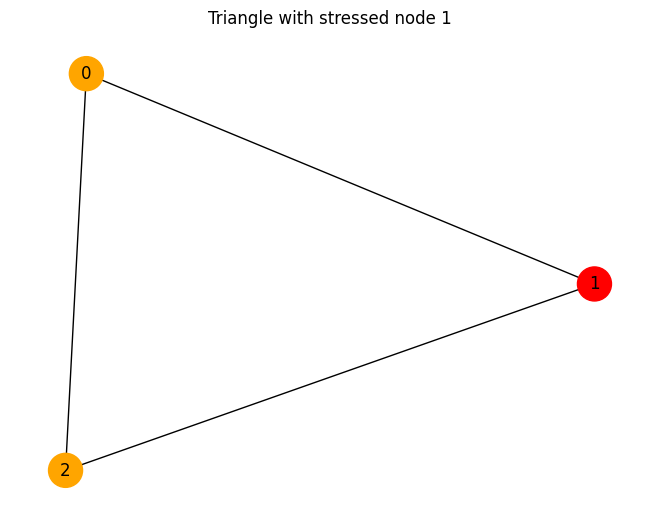

In [ ]:
import random

# Initialize signal strength
strength = {n: 1.0 for n in G.nodes()}
target = random.choice(list(G.nodes()))
print("Stressing node:", target)

for cycle in range(1, 6):
    strength[target] *= 0.7
    for nbr in G.neighbors(target):
        strength[nbr] *= 0.9

    weakest = sorted(strength.items(), key=lambda x: x[1])[:5]
    print(f"Cycle {cycle}: weakest nodes:", weakest)

# Visualize a triangle that includes the stressed node
tri = next((t for t in triangles if target in t), None)
if tri:
    H = G.subgraph(tri)
    colors = ['red' if n == target else 'orange' for n in H.nodes()]
    nx.draw(H, with_labels=True, node_color=colors, node_size=600)
    plt.title(f"Triangle with stressed node {target}")
    plt.show()
else:
    print("No triangle found that includes stressed node.")


This simulation applies targeted stress to one random node in the network and tracks how the stress affects that node and its immediate neighbors over 5 cycles. It prints the 5 weakest nodes in each cycle based on their declining signal strength. If the stressed node is part of a triangle motif, it visualizes that triangle with the stressed node in red and the others in orange, helping us see the localized collapse of a motif.



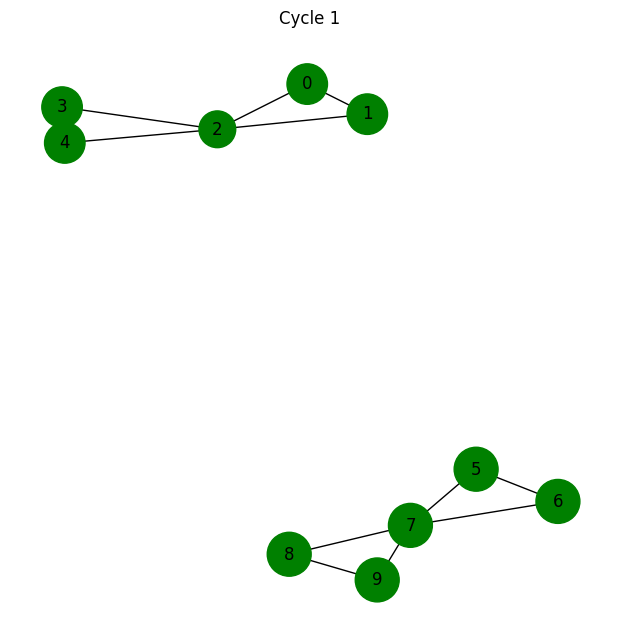

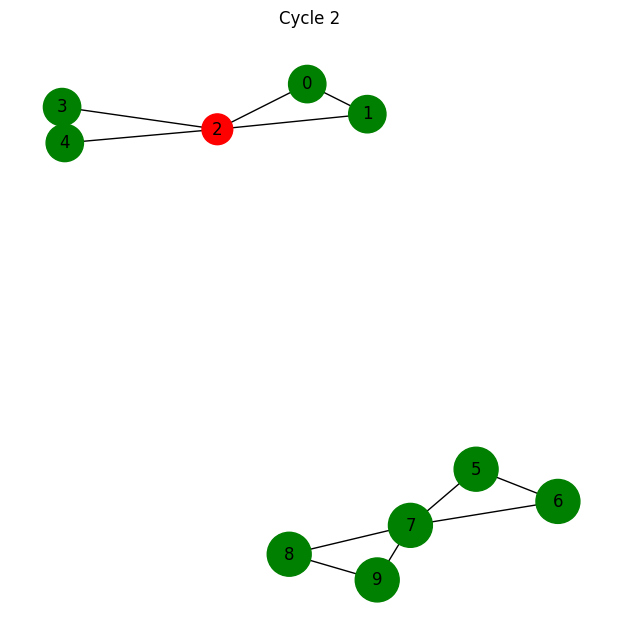

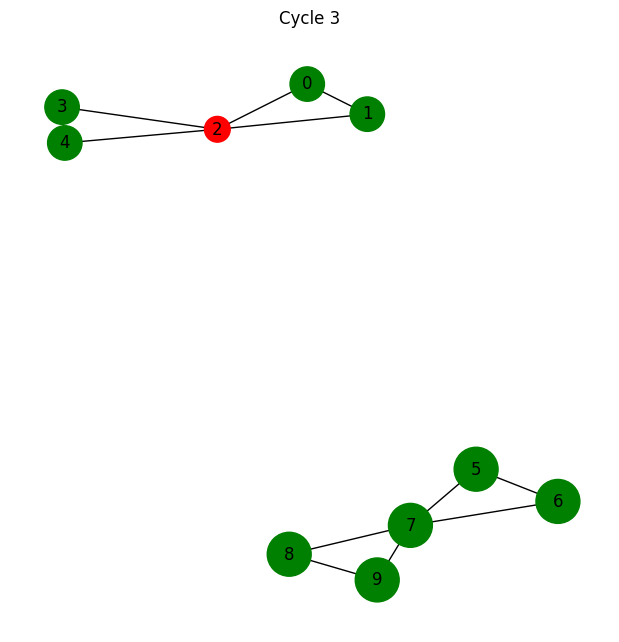

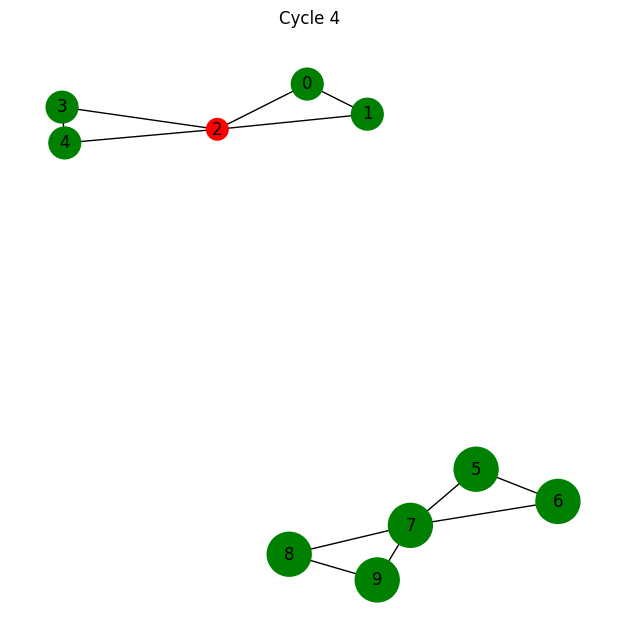

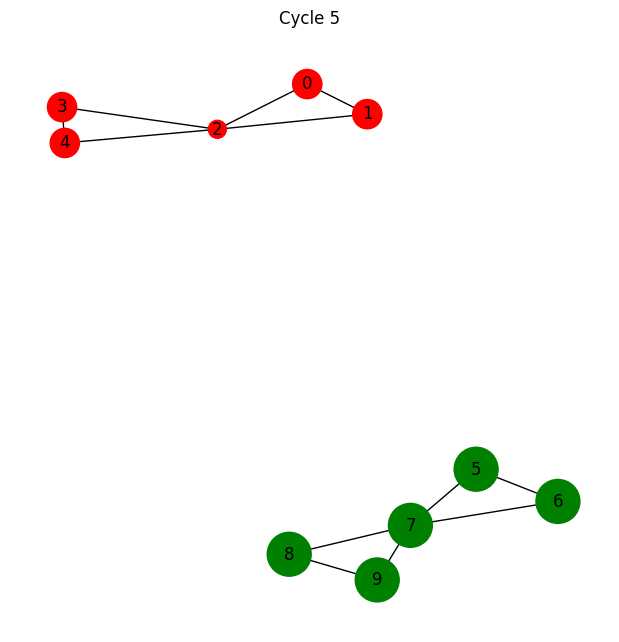

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define weighted triangle motifs manually
weighted_edges = [
    (0,1,0.9), (1,2,0.8), (2,0,0.85),     # Triangle 1
    (2,3,0.7), (3,4,0.95), (4,2,0.75),    # Triangle 2
    (5,6,0.9), (6,7,0.6), (7,5,0.7),      # Triangle 3
    (7,8,0.9), (8,9,0.8), (9,7,0.85)      # Triangle 4
]

# Build graph
G = nx.Graph()
G.add_weighted_edges_from(weighted_edges)

# Initialize node strengths
strength = {n: 1.0 for n in G.nodes()}
target = 2  # Target node for stress

# Run 5 cycles of stress
for cycle in range(5):
    strength[target] *= 0.7
    for neighbor in G.neighbors(target):
        strength[neighbor] *= 0.85

    # Color & size based on node strength
    colors = ['red' if strength[n] < 0.5 else 'green' for n in G.nodes()]
    sizes = [strength[n]*1000 for n in G.nodes()]

    # Plot
    plt.figure(figsize=(6,6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color=colors, node_size=sizes)
    plt.title(f"Cycle {cycle+1}")
    plt.show()


In this extended simulation, we define 4 triangle motifs with different connection strengths (weights) to reflect more realistic network behavior. Node 2 is chosen as the point of stress. Across 5 cycles, its signal strength degrades, and its neighbors are also affected. The network is visualized in each cycle using node color (green = strong, red = weak) and size (larger = stronger signal). This shows how stress spreads over time in a structurally stable but vulnerable motif-based system.

